# Imports

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

# EDA

In [2]:
data = pd.read_csv("drive/MyDrive/insurance.csv")

In [3]:
data.shape

(1338, 7)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


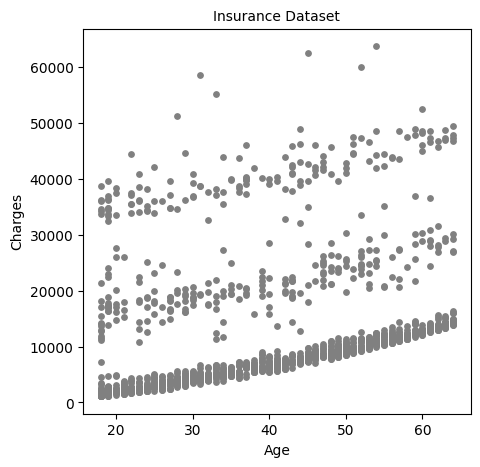

In [6]:
X = data.iloc[:, [0, 6]]
X = X.drop_duplicates()
plt.figure(figsize=(5,5))
plt.scatter(X['age'],X['charges'],s=15,color='grey')
plt.title('Insurance Dataset',fontsize=10)
plt.xlabel('Age',fontsize=10)
plt.ylabel('Charges',fontsize=10)
plt.show()

# Clustering

## K-means

In [7]:
k_means=KMeans(n_clusters=3,random_state=42)
k_means.fit(X[['age', 'charges']])

KMeans(n_clusters=3, random_state=42)

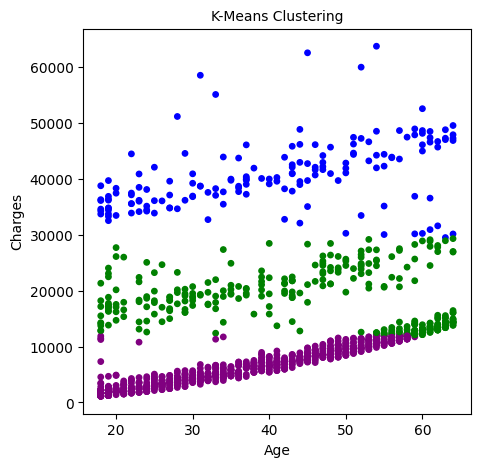

In [8]:
X['KMeans_labels']=k_means.labels_

colors=['purple','red','blue','green']
plt.figure(figsize=(5,5))
plt.scatter(X['age'],X['charges'],c=X['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=10)
plt.xlabel('Age',fontsize=10)
plt.ylabel('Charges',fontsize=10)
plt.show()

In [9]:
metrics.silhouette_score(X[['age', 'charges']], k_means.labels_)

0.6030151145835371

## Hierarchical

In [10]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
model.fit(X[['age', 'charges']])

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

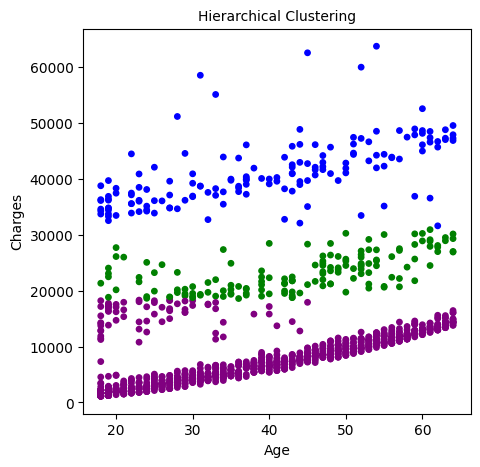

In [11]:
# Plotting Hierarchical Clustering
X['HR_labels']=model.labels_

# Plotting resulting clusters
plt.figure(figsize=(5,5))
plt.scatter(X['age'],X['charges'],c=X['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=10)
plt.xlabel('Age',fontsize=10)
plt.ylabel('Charges',fontsize=10)
plt.show()

In [12]:
metrics.silhouette_score(X[['age', 'charges']], model.labels_)

0.6385679291104686

## DBScan

In [13]:
dbscan=DBSCAN()
dbscan.fit(X[['age', 'charges']])

DBSCAN()

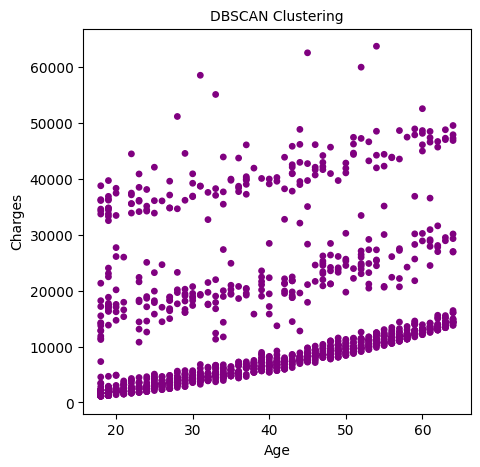

In [14]:
X['DBSCAN_labels']=dbscan.labels_

plt.figure(figsize=(5,5))
plt.scatter(X['age'],X['charges'],c=X['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=10)
plt.xlabel('Age',fontsize=10)
plt.ylabel('Charges',fontsize=10)
plt.show()

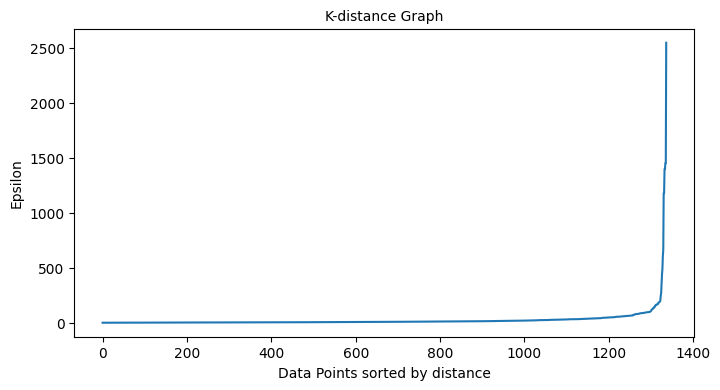

In [15]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X[['age', 'charges']])
distances, indices = nbrs.kneighbors(X[['age', 'charges']])

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(8,4))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=10)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=10)
plt.show()

In [16]:
dbscan_opt=DBSCAN(eps=250)
dbscan_opt.fit(X[['age', 'charges']])

DBSCAN(eps=250)

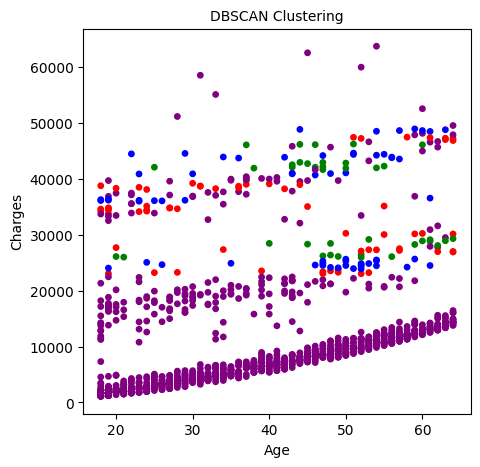

In [17]:
X['DBSCAN_opt_labels']=dbscan_opt.labels_

plt.figure(figsize=(5,5))
plt.scatter(X['age'],X['charges'],c=X['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=10)
plt.xlabel('Age',fontsize=10)
plt.ylabel('Charges',fontsize=10)
plt.show()

In [18]:
metrics.silhouette_score(X[['age', 'charges']], dbscan_opt.labels_)

0.4293258908488161

# Clustering after scaling

## Scaling

In [19]:
X = data.iloc[:, [0, 6]]
X = X.drop_duplicates()

scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1337.0,0.461351,0.305312,0.0,0.195652,0.456522,0.717391,1.0
charges,1337.0,0.194055,0.193306,0.0,0.057854,0.131915,0.247984,1.0


## K-means

In [20]:
k_means=KMeans(n_clusters=3,random_state=42)
k_means.fit(X[['age', 'charges']])

KMeans(n_clusters=3, random_state=42)

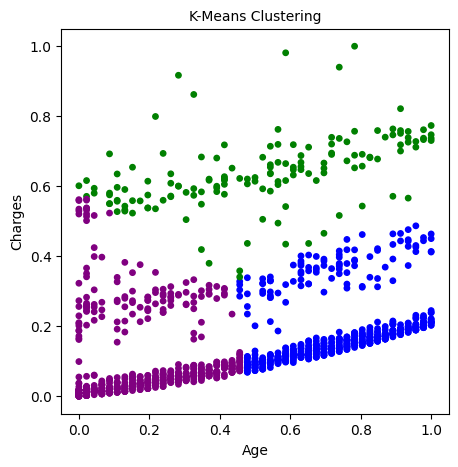

In [21]:
X['KMeans_labels']=k_means.labels_

colors=['purple','red','blue','green']
plt.figure(figsize=(5,5))
plt.scatter(X['age'],X['charges'],c=X['KMeans_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('K-Means Clustering',fontsize=10)
plt.xlabel('Age',fontsize=10)
plt.ylabel('Charges',fontsize=10)
plt.show()

In [22]:
metrics.silhouette_score(X[['age', 'charges']], k_means.labels_)

0.524349194953569

## Hierarchical

In [23]:
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean')
model.fit(X[['age', 'charges']])

AgglomerativeClustering(affinity='euclidean', n_clusters=3)

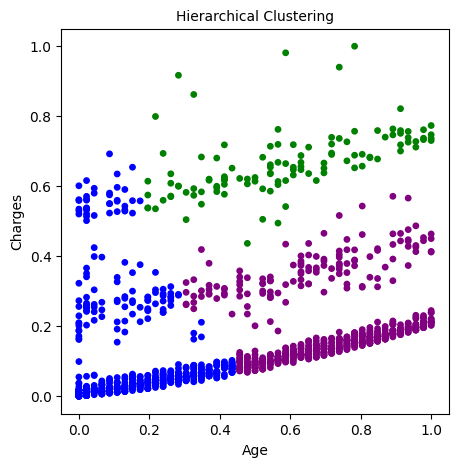

In [24]:
# Plotting Hierarchical Clustering
X['HR_labels']=model.labels_

# Plotting resulting clusters
plt.figure(figsize=(5,5))
plt.scatter(X['age'],X['charges'],c=X['HR_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('Hierarchical Clustering',fontsize=10)
plt.xlabel('Age',fontsize=10)
plt.ylabel('Charges',fontsize=10)
plt.show()

In [25]:
metrics.silhouette_score(X[['age', 'charges']], model.labels_)

0.5062854486242881

## DBScan

In [26]:
dbscan=DBSCAN()
dbscan.fit(X[['age', 'charges']])

DBSCAN()

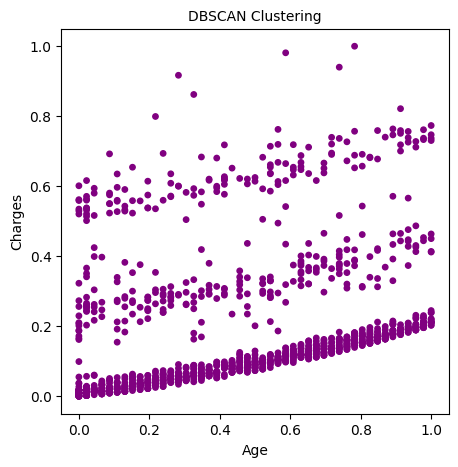

In [27]:
X['DBSCAN_labels']=dbscan.labels_

plt.figure(figsize=(5,5))
plt.scatter(X['age'],X['charges'],c=X['DBSCAN_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=10)
plt.xlabel('Age',fontsize=10)
plt.ylabel('Charges',fontsize=10)
plt.show()

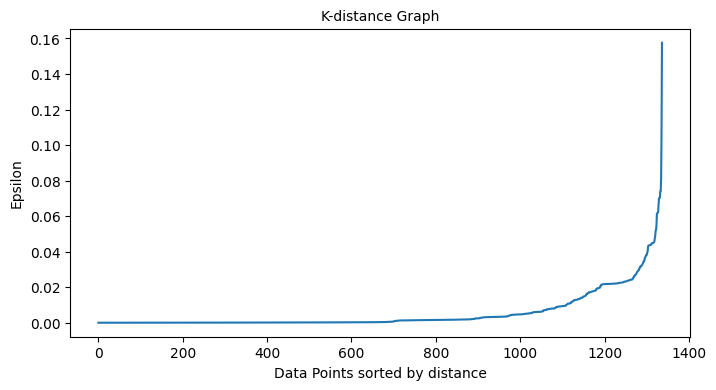

In [28]:
from sklearn.neighbors import NearestNeighbors
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(X[['age', 'charges']])
distances, indices = nbrs.kneighbors(X[['age', 'charges']])

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(8,4))
plt.plot(distances)
plt.title('K-distance Graph',fontsize=10)
plt.xlabel('Data Points sorted by distance',fontsize=10)
plt.ylabel('Epsilon',fontsize=10)
plt.show()

In [34]:
dbscan_opt=DBSCAN(eps=0.05)
dbscan_opt.fit(X[['age', 'charges']])

DBSCAN(eps=0.05)

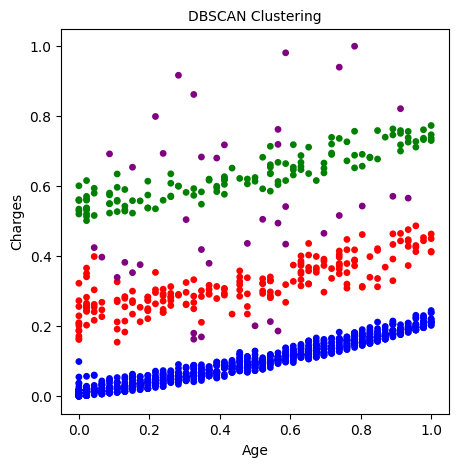

In [35]:
X['DBSCAN_opt_labels']=dbscan_opt.labels_

plt.figure(figsize=(5,5))
plt.scatter(X['age'],X['charges'],c=X['DBSCAN_opt_labels'],cmap=matplotlib.colors.ListedColormap(colors),s=15)
plt.title('DBSCAN Clustering',fontsize=10)
plt.xlabel('Age',fontsize=10)
plt.ylabel('Charges',fontsize=10)
plt.show()

In [36]:
metrics.silhouette_score(X[['age', 'charges']], dbscan_opt.labels_)

0.17028900782628884